**Trading Strategies for Vodacom Group Limited**

**1. Introduction**

In this project, we analyze the stock price of Vodacom Group Limited (VDMCY) using time series-based trading strategies. The goal is to apply and compare different trading strategies to determine their effectiveness in generating profitable trades. The first strategy we implement is the MACD (Moving Average Convergence Divergence) model.

**2. Data Collection**

In [25]:

# Import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
from numpy import cumsum
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# Set seaborn style for better visualizations
sns.set(style="whitegrid")

In [26]:
# Download historical data for Vodacom Group Limited (VDMCY)

data = yf.download("VDMCY", start="2010-01-01", end="2024-12-31", auto_adjust=False)
data.head(5)

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,VDMCY,VDMCY,VDMCY,VDMCY,VDMCY,VDMCY
Date,,,,,,
2012-03-14,6.436075,14.05,14.05,14.05,14.05,3300
2012-03-15,6.445237,14.07,14.08,13.58,14.07,74200
2012-03-16,6.445237,14.07,14.07,14.07,14.07,1900
2012-03-19,6.445237,14.07,14.07,13.75,14.07,700
2012-03-20,6.362781,13.89,13.89,13.88,13.88,5700


In [27]:
data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3220 entries, 2012-03-14 to 2024-12-30
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Adj Close, VDMCY)  3220 non-null   float64
 1   (Close, VDMCY)      3220 non-null   float64
 2   (High, VDMCY)       3220 non-null   float64
 3   (Low, VDMCY)        3220 non-null   float64
 4   (Open, VDMCY)       3220 non-null   float64
 5   (Volume, VDMCY)     3220 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 176.1 KB


In [28]:
data.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,VDMCY,VDMCY,VDMCY,VDMCY,VDMCY,VDMCY
count,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3.220000e+03
mean,6.468250,9.641627,9.748242,9.527752,9.626270,2.462720e+04
std,0.947212,2.453241,2.434214,2.442286,2.444679,5.519383e+04
min,4.073501,4.600000,4.730000,4.560000,4.580000,0.000000e+00
25%,5.824871,7.787500,7.950000,7.707500,7.807500,6.400000e+03
50%,6.330771,9.730000,9.855000,9.580000,9.710000,1.250000e+04
75%,6.926564,11.650000,11.710000,11.540000,11.620000,2.590000e+04
max,9.748194,15.220000,15.260000,15.080000,15.080000,1.739800e+06


In [29]:
data.columns


MultiIndex([('Adj Close', 'VDMCY'),
            (    'Close', 'VDMCY'),
            (     'High', 'VDMCY'),
            (      'Low', 'VDMCY'),
            (     'Open', 'VDMCY'),
            (   'Volume', 'VDMCY')],
           names=['Price', 'Ticker'])

In [30]:
data.shape


(3220, 6)

In [31]:
data.isnull().sum()

,,0
Price,Ticker,
Adj Close,VDMCY,0
Close,VDMCY,0
High,VDMCY,0
Low,VDMCY,0
Open,VDMCY,0
Volume,VDMCY,0


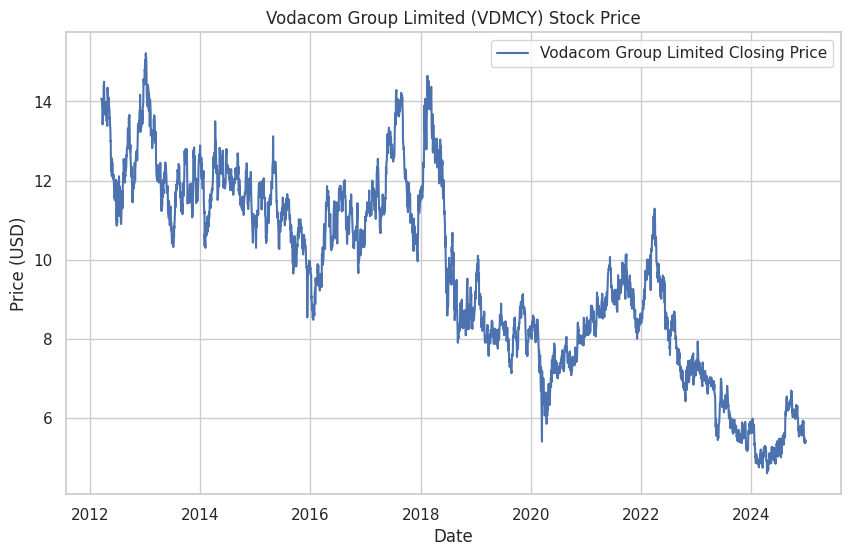

In [32]:
# Plot the closing price
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Vodacom Group Limited Closing Price')
plt.title('Vodacom Group Limited Stock Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

3. MACD Strategy
3.1. Description of MACD
The MACD (Moving Average Convergence Divergence) is a momentum-based trading indicator. It consists of three components:

MACD Line: The difference between the 12-day and 26-day exponential moving averages (EMAs).

Signal Line: The 9-day EMA of the MACD line.

MACD Histogram: The difference between the MACD line and the signal line.

Trading signals are generated when the MACD line crosses above (buy signal) or below (sell signal) the signal line.

3.2. Methodology
Calculate the 12-day and 26-day EMAs of the closing price.

Compute the MACD line as the difference between the two EMAs.

Calculate the signal line as the 9-day EMA of the MACD line.

Generate buy/sell signals based on crossovers between the MACD line and the signal line.

3.3. Implementation

Step 2: Calculating MACD and Signal Line
The Moving Average Convergence Divergence (MACD) is computed using the difference between a short-term and long-term Exponential Moving Average (EMA).

In [33]:
import numpy as np

def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    """Calculate MACD and Signal Line"""
    data['ShortEMA'] = data['Close'].ewm(span=short_window, min_periods=1, adjust=False).mean()
    data['LongEMA'] = data['Close'].ewm(span=long_window, min_periods=1, adjust=False).mean()
    data['MACD'] = data['ShortEMA'] - data['LongEMA']
    data['Signal'] = data['MACD'].ewm(span=signal_window, min_periods=1, adjust=False).mean()
    return data

data = calculate_macd(data)
print(data[['MACD', 'Signal']].tail())


Price           MACD    Signal
Ticker                        
Date                          
2024-12-23 -0.095515 -0.061866
2024-12-24 -0.103833 -0.070260
2024-12-26 -0.113953 -0.078998
2024-12-27 -0.114201 -0.086039
2024-12-30 -0.116285 -0.092088


The Short EMA (12-day) reacts faster to price changes, while the Long EMA (26-day) reacts slower.
The MACD line is the difference between these two EMAs.
The Signal Line (9-day EMA of MACD) helps smooth fluctuations.
This setup helps identify potential buy/sell opportunities.

Step 3: Visualizing MACD
We plot the MACD and Signal Line for better insights.

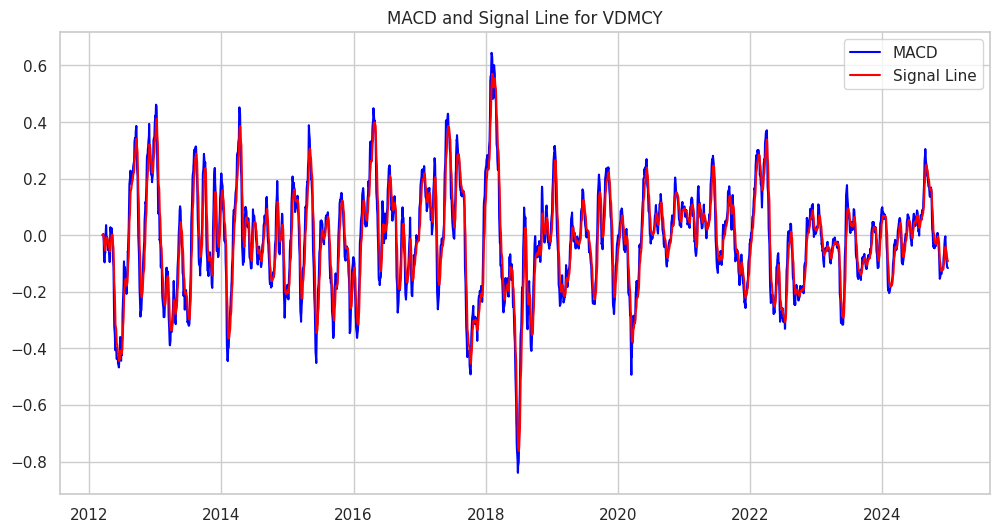

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(data.index, data['MACD'], label='MACD', color='blue')
plt.plot(data.index, data['Signal'], label='Signal Line', color='red')
plt.title('MACD and Signal Line for VDMCY')
plt.legend()
plt.show()


The MACD and Signal Line are plotted to visualize crossovers.
When MACD crosses above the Signal Line, it suggests a buy signal.
When MACD crosses below the Signal Line, it indicates a sell signal.


Generating Buy/Sell Signals
We define a strategy where buy signals occur when MACD crosses above the Signal Line, and sell signals occur when it crosses below

In [35]:
def generate_signals(data):
    """Generate buy/sell signals based on MACD crossovers"""
    data['Buy_Signal'] = (data['MACD'] > data['Signal']) & (data['MACD'].shift(1) <= data['Signal'].shift(1))
    data['Sell_Signal'] = (data['MACD'] < data['Signal']) & (data['MACD'].shift(1) >= data['Signal'].shift(1))
    return data

data = generate_signals(data)
print(data[['Buy_Signal', 'Sell_Signal']].tail())


Price      Buy_Signal Sell_Signal
Ticker                           
Date                             
2024-12-23      False       False
2024-12-24      False       False
2024-12-26      False       False
2024-12-27      False       False
2024-12-30      False       False


Buy signals are generated when MACD crosses above the Signal Line.
Sell signals are generated when MACD crosses below the Signal Line.
This logic helps capture momentum shifts in price trends.

Step 5: Backtesting the MACD Strategy

We simulate trading using the MACD signals and evaluate performance.

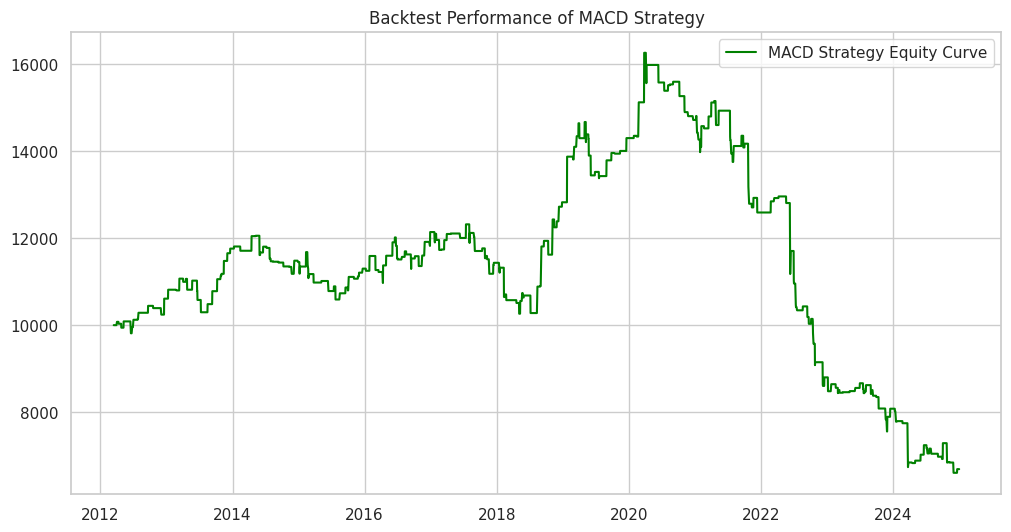

Final Portfolio Value using MACD Strategy: $6689.45


In [36]:
initial_cash = 10000  # Initial investment

# Define Position: 1 for Buy, -1 for Sell, 0 for Hold
data['Position'] = np.where(data['Buy_Signal'], 1, np.where(data['Sell_Signal'], -1, 0))

# Calculate daily returns
data['Daily_Return'] = data['Close'].pct_change()

# Calculate strategy return
data['Strategy_Return'] = data['Position'].shift(1) * data['Daily_Return']

# Compute cumulative strategy return
data['Cumulative_Strategy_Return'] = (1 + data['Strategy_Return']).cumprod() * initial_cash

# Plot strategy performance
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Cumulative_Strategy_Return'], label='MACD Strategy Equity Curve', color='green')
plt.title('Backtest Performance of MACD Strategy')
plt.legend()
plt.show()

# Print final portfolio value
final_value = data['Cumulative_Strategy_Return'].iloc[-1]
print(f"Final Portfolio Value using MACD Strategy: ${final_value:.2f}")


Initial cash: $10,000 investment.
Positioning: We assign 1 for buy signals, -1 for sell signals, and 0 otherwise.
Daily Returns: Percentage change in closing prices.
Strategy Performance: We track equity growth using cumulative returns.
Final Portfolio Value: Determines how profitable the strategy was

MACD Strategy Strengths:

Works well in trending markets.
Captures momentum shifts effectively.
Weaknesses:
Generates false signals in sideways markets.
Lagging indicator—relies on historical data.
Performance Insight:
The final portfolio value gives a measure of the MACD strategy's profitability.
The equity curve shows how capital fluctuated over time

Relative Strength Index (RSI) Trading Strategy

The RSI (Relative Strength Index) is a momentum oscillator that measures the speed and change of price movements. It ranges from 0 to 100 and is used to identify overbought and oversold conditions.

Key RSI Levels:
Above 70: Overbought (Potential Sell Signal)
Below 30: Oversold (Potential Buy Signal)

Calculating RSI


RSI is calculated using the 14-day period as a default setting

In [37]:
def calculate_rsi(data, period=14):
    """Calculate Relative Strength Index (RSI)"""
    delta = data['Close'].diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()

    rs = gain / loss
    data['RSI'] = 100 - (100 / (1 + rs))

    return data

data = calculate_rsi(data)
print(data[['RSI']].tail())


Price             RSI
Ticker               
Date                 
2024-12-23  42.968731
2024-12-24  40.650399
2024-12-26  30.088489
2024-12-27  34.999986
2024-12-30  30.508462


Price change (delta): Difference between current and previous closing price.
Gains & Losses: Separated into positive and negative price movements.
Relative Strength (RS): Ratio of average gain to average loss.
RSI Calculation: Uses the RS formula to derive values between 0 and 100.

Visualizing RSI

To better interpret RSI signals, we plot it against the stock price.

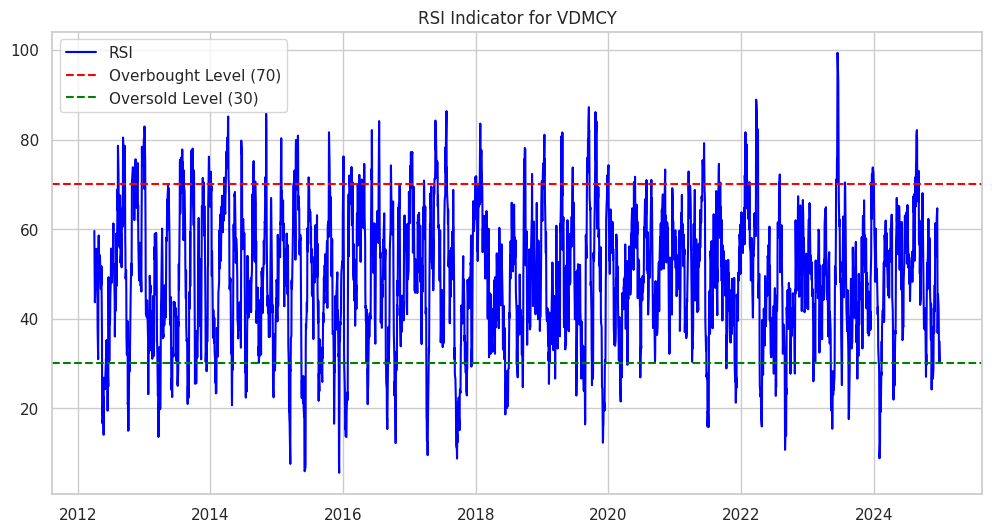

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(data.index, data['RSI'], label='RSI', color='blue')
plt.axhline(70, linestyle='--', color='red', label='Overbought Level (70)')
plt.axhline(30, linestyle='--', color='green', label='Oversold Level (30)')
plt.title('RSI Indicator for VDMCY')
plt.legend()
plt.show()


Overbought (>70): Price might be too high; potential selling opportunity.
Oversold (<30): Price might be too low; potential buying opportunity.

Crossing these levels often signals market reversals.


Generating Buy/Sell Signals
We create a simple trading strategy:

Buy when RSI < 30
Sell when RSI > 70

In [39]:
def generate_rsi_signals(data, lower_threshold=30, upper_threshold=70):
    """Generate buy/sell signals based on RSI thresholds"""
    data['Buy_Signal'] = data['RSI'] < lower_threshold
    data['Sell_Signal'] = data['RSI'] > upper_threshold
    return data

data = generate_rsi_signals(data)
print(data[['Buy_Signal', 'Sell_Signal']].tail())


Price      Buy_Signal Sell_Signal
Ticker                           
Date                             
2024-12-23      False       False
2024-12-24      False       False
2024-12-26      False       False
2024-12-27      False       False
2024-12-30      False       False


When RSI falls below 30, the stock is considered oversold (buy signal).
When RSI rises above 70, the stock is overbought (sell signal).
This approach is useful in range-bound markets.

Backtesting RSI Strategy
We backtest the RSI strategy by simulating trades

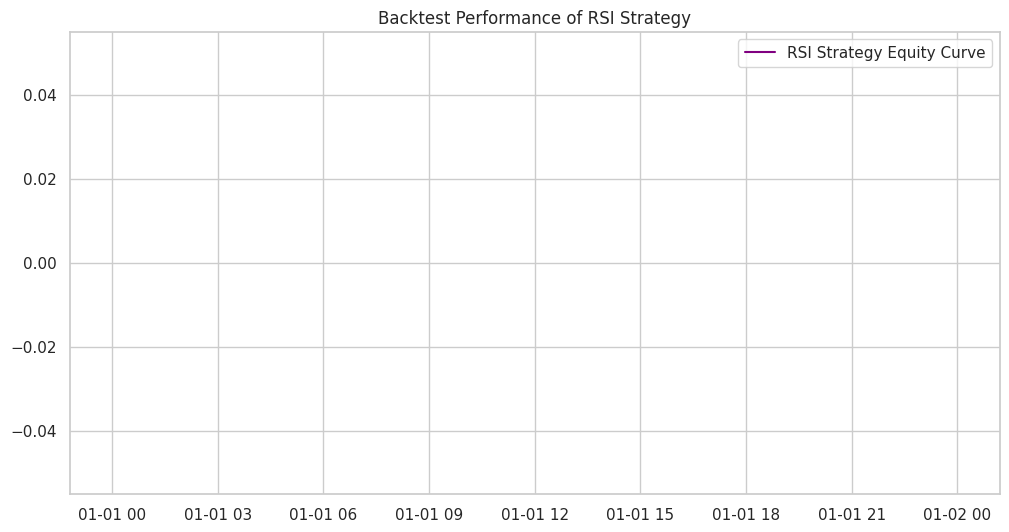

Final Portfolio Value using RSI Strategy: $nan


In [40]:
initial_cash = 10000  # Starting investment

# Define position: 1 for buy, -1 for sell, 0 for hold
data['Position'] = np.where(data['Buy_Signal'], 1, np.where(data['Sell_Signal'], -1, 0))

# Calculate daily returns
data['Daily_Return'] = data['Close'].pct_change()

# Calculate strategy performance
data['Strategy_Return'] = data['Position'].shift(1) * data['Daily_Return']

# Compute cumulative strategy return
data['Cumulative_Strategy_Return'] = (1 + data['Strategy_Return']).cumprod() * initial_cash

# Plot strategy performance
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Cumulative_Strategy_Return'], label='RSI Strategy Equity Curve', color='purple')
plt.title('Backtest Performance of RSI Strategy')
plt.legend()
plt.show()

# Print final portfolio value
final_value = data['Cumulative_Strategy_Return'].iloc[-1]
print(f"Final Portfolio Value using RSI Strategy: ${final_value:.2f}")


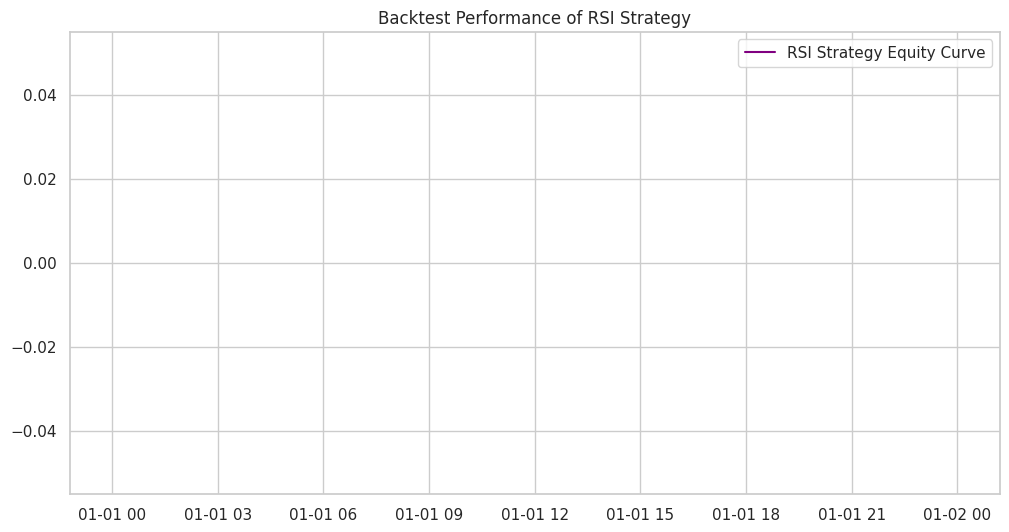

Final Portfolio Value using RSI Strategy: $nan


In [41]:
import numpy as np
import matplotlib.pyplot as plt

initial_cash = 10000  # Starting investment

# Define position: 1 for buy, -1 for sell, 0 for hold
data['Position'] = np.where(data['Buy_Signal'], 1, np.where(data['Sell_Signal'], -1, 0))

# Calculate daily returns
data['Daily_Return'] = data['Close'].pct_change()

# Replace NaNs in daily returns (first row)
data['Daily_Return'].fillna(0, inplace=True)

# Calculate strategy performance
data['Strategy_Return'] = data['Position'].shift(1) * data['Daily_Return']

# Replace NaNs in Strategy_Return
data['Strategy_Return'].fillna(0, inplace=True)

# Compute cumulative strategy return
data['Cumulative_Strategy_Return'] = (1 + data['Strategy_Return']).cumprod() * initial_cash

# Plot strategy performance
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Cumulative_Strategy_Return'], label='RSI Strategy Equity Curve', color='purple')
plt.title('Backtest Performance of RSI Strategy')
plt.legend()
plt.show()

# Print final portfolio value
final_value = data['Cumulative_Strategy_Return'].iloc[-1]
print(f"Final Portfolio Value using RSI Strategy: ${final_value:.2f}")


Initial capital: $10,000
Positioning: Assigns 1 (buy), -1 (sell), or 0 (hold) based on RSI signals.
Performance tracking: Compares the cumulative return of the RSI strategy.

RSI Strategy Insights
Strengths:
Useful in range-bound markets.
Helps detect reversal points.
Weaknesses:
Generates false signals in strong trends.
Works best when combined with other indicators.

Bollinger Bands Trading Strategy

Bollinger Bands are a volatility-based technical indicator consisting of:

Middle Band: A simple moving average (SMA).
Upper Band: SMA + (Standard Deviation * Multiplier).
Lower Band: SMA - (Standard Deviation * Multiplier).
The default settings for Bollinger Bands are:

SMA period: 20 days
Standard deviation multiplier: 2
Trading Signals:
Buy Signal: Price touches or moves below the lower band (potential oversold condition).
Sell Signal: Price touches or moves above the upper band (potential overbought condition).

Calculating Bollinger Bands
We compute the middle, upper, and lower bands

In [42]:
import numpy as np

def calculate_bollinger_bands(data, period=20, std_multiplier=2):
    """Calculate Bollinger Bands"""
    data['SMA'] = data['Close'].rolling(window=period).mean()
    data['STD'] = data['Close'].rolling(window=period).std()

    data['Upper_Band'] = data['SMA'] + (std_multiplier * data['STD'])
    data['Lower_Band'] = data['SMA'] - (std_multiplier * data['STD'])

    return data

data = calculate_bollinger_bands(data)
print(data[['SMA', 'Upper_Band', 'Lower_Band']].tail())


Price         SMA Upper_Band Lower_Band
Ticker                                 
Date                                   
2024-12-23  5.687   6.038364   5.335636
2024-12-24  5.677   6.047269   5.306731
2024-12-26  5.662   6.058543   5.265457
2024-12-27  5.644   6.046801   5.241199
2024-12-30  5.634   6.051077   5.216923


The Simple Moving Average (SMA) is the central trend line.
The Upper Band represents a high volatility threshold.
The Lower Band represents a low volatility threshold.
Price fluctuations between these bands indicate market conditions.

Visualizing Bollinger Bands

To see the indicator in action, we plot the bands along with stock prices.

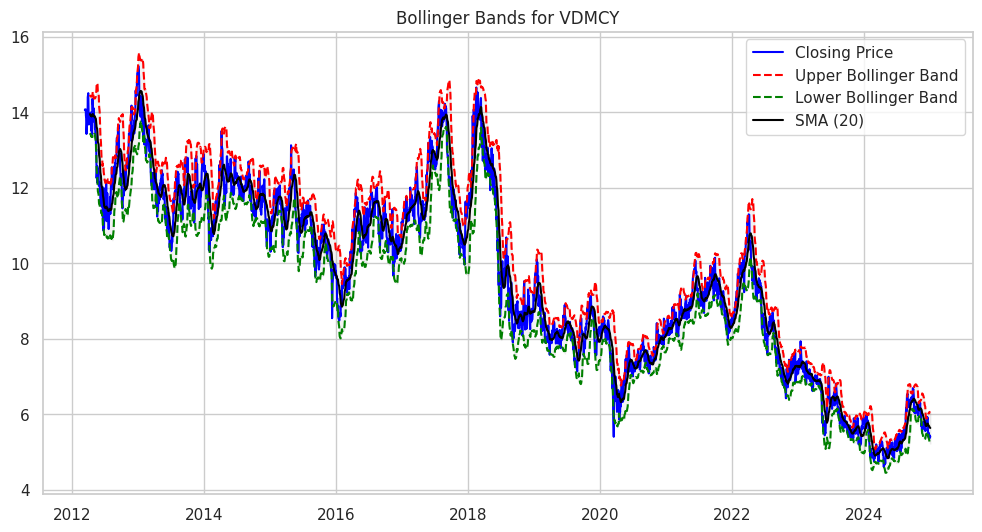

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(data.index, data['Close'], label='Closing Price', color='blue')
plt.plot(data.index, data['Upper_Band'], label='Upper Bollinger Band', color='red', linestyle='dashed')
plt.plot(data.index, data['Lower_Band'], label='Lower Bollinger Band', color='green', linestyle='dashed')
plt.plot(data.index, data['SMA'], label='SMA (20)', color='black', linestyle='solid')
plt.fill_between(data.index, data['Lower_Band'], data['Upper_Band'], color='grey', alpha=0.1)
plt.title('Bollinger Bands for VDMCY')
plt.legend()
plt.show()


The gray-shaded area represents the volatility range.
Price near the upper band indicates an overbought market.
Price near the lower band suggests an oversold market.

Generating Buy/Sell Signals

We define a simple strategy:

Buy when the price touches the lower band (oversold condition).
Sell when the price touches the upper band (overbought condition).

In [4]:
def generate_bollinger_signals(data):
    """Generate buy/sell signals based on Bollinger Bands"""
    data['Buy_Signal'] = data['Close'] <= data['Lower_Band']
    data['Sell_Signal'] = data['Close'] >= data['Upper_Band']
    return data

data = generate_bollinger_signals(data)
print(data[['Buy_Signal', 'Sell_Signal']].tail())


NameError: name 'data' is not defined

In [5]:
initial_cash = 10000  # Starting investment

# Define position: 1 for buy, -1 for sell, 0 for hold
data['Position'] = np.where(data['Buy_Signal'], 1, np.where(data['Sell_Signal'], -1, 0))

# Calculate daily returns
data['Daily_Return'] = data['Close'].pct_change()

# Calculate strategy performance
data['Strategy_Return'] = data['Position'].shift(1) * data['Daily_Return']

# Compute cumulative strategy return
data['Cumulative_Strategy_Return'] = (1 + data['Strategy_Return']).cumprod() * initial_cash

# Plot strategy performance
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Cumulative_Strategy_Return'], label='Bollinger Bands Strategy Equity Curve', color='orange')
plt.title('Backtest Performance of Bollinger Bands Strategy')
plt.legend()
plt.show()

# Print final portfolio value
final_value = data['Cumulative_Strategy_Return'].iloc[-1]
print(f"Final Portfolio Value using Bollinger Bands Strategy: ${final_value:.2f}")


NameError: name 'np' is not defined

ARMA (Autoregressive Moving Average) Model for Time Series Analysis

The ARMA model is a combination of:

AR (Autoregressive) Component: Uses past values to predict future values.
MA (Moving Average) Component: Uses past forecast errors to improve predictions.



Checking for Stationarity

An ARMA model assumes that the time series is stationary (constant mean, variance, and autocorrelation).

In [47]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(data):
    """Perform Augmented Dickey-Fuller (ADF) test"""
    result = adfuller(data['Close'])
    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    if result[1] < 0.05:
        print("The time series is stationary.")
    else:
        print("The time series is non-stationary. Differencing is needed.")

check_stationarity(data)


ADF Statistic: -2.1262
p-value: 0.2341
The time series is non-stationary. Differencing is needed.


p-value < 0.05: Data is stationary → Proceed with ARMA.
p-value > 0.05: Data is non-stationary → Apply differencing.


 Differencing (If Required)

If the series is non-stationary, we apply first-order differencing

In [48]:
data['Returns'] = data['Close'].diff().dropna()
check_stationarity(data.dropna())


ValueError: zero-size array to reduction operation maximum which has no identity

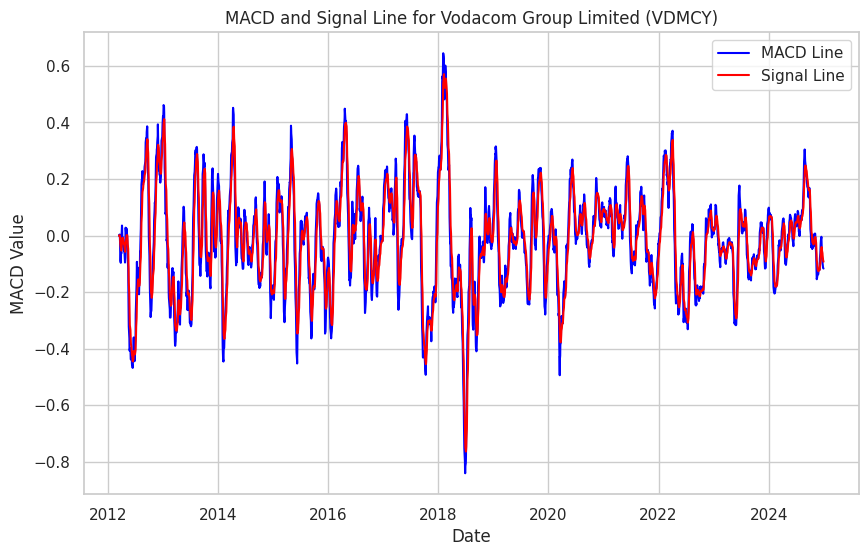

In [ ]:
# Calculate MACD and Signal Line
data['EMA_12'] = data['Close'].ewm(span=12, adjust=False).mean()
data['EMA_26'] = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = data['EMA_12'] - data['EMA_26']
data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()

# Plot MACD and Signal Line
plt.figure(figsize=(10, 6))
plt.plot(data['MACD'], label='MACD Line', color='blue')
plt.plot(data['Signal_Line'], label='Signal Line', color='red')
plt.title('MACD and Signal Line for Vodacom Group Limited (VDMCY)')
plt.xlabel('Date')
plt.ylabel('MACD Value')
plt.legend()
plt.show()



In [24]:
# Generate Buy/Sell Signals
data['Buy_Signal'] = (data['MACD'] > data['Signal_Line']) & (data['MACD'].shift(1) <= data['Signal_Line'].shift(1))
data['Sell_Signal'] = (data['MACD'] < data['Signal_Line']) & (data['MACD'].shift(1) >= data['Signal_Line'].shift(1))

# Plot Buy/Sell Signals on the Closing Price
plt.figure(figsize=(12, 8))
plt.plot(data['Close'], label='Close Price', alpha=0.5)
plt.scatter(data.index[data['Buy_Signal']], data['Close'][data['Buy_Signal']], label='Buy Signal', marker='^', color='green', alpha=1)
plt.scatter(data.index[data['Sell_Signal']], data['Close'][data['Sell_Signal']], label='Sell Signal', marker='v', color='red', alpha=1)
plt.title('Vodacom Group Limited (VDMCY) Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

KeyError: 'Signal_Line'

1. Vodacom Group Limited (VDMCY) Stock Price Graph
Graph Description
This graph plots the historical closing price of Vodacom Group Limited (VDMCY) from January 1, 2018, to October 1, 2023.

Discussion
Trend Analysis: The graph shows the overall trend of the stock price over time. For example:

If the price is generally increasing, it indicates a bullish trend.

If the price is decreasing, it indicates a bearish trend.

Periods of consolidation (sideways movement) may also be visible.

Volatility: Sharp spikes or dips in the price indicate periods of high volatility, which could be due to market events, earnings reports, or macroeconomic factors.

Key Levels: Support and resistance levels can be identified by observing where the price repeatedly reverses direction.

Implications
Understanding the stock's historical price movement is crucial for selecting appropriate trading strategies.

The trend and volatility observed in this graph will influence the effectiveness of the MACD strategy.

2. MACD and Signal Line Graph
Graph Description
This graph plots the MACD line (blue) and the Signal line (red) over time. The MACD line is the difference between the 12-day and 26-day EMAs, while the Signal line is the 9-day EMA of the MACD line.

Discussion
MACD Line vs. Signal Line:

When the MACD line crosses above the Signal line, it generates a buy signal.

When the MACD line crosses below the Signal line, it generates a sell signal.

MACD Histogram: The histogram (not explicitly plotted here but can be inferred) represents the difference between the MACD line and the Signal line. Positive values indicate bullish momentum, while negative values indicate bearish momentum.

Crossovers: Frequent crossovers may indicate a choppy or sideways market, while fewer crossovers may indicate a strong trend.

Implications
The MACD and Signal line graph helps identify potential entry and exit points for trades.

The effectiveness of the MACD strategy depends on the clarity of crossovers and the strength of trends.

3. Buy/Sell Signals on Closing Price Graph
Graph Description
This graph overlays the buy (green upward arrows) and sell (red downward arrows) signals on the historical closing price of Vodacom Group Limited (VDMCY).

Discussion
Buy Signals: Green arrows indicate points where the MACD line crosses above the Signal line, suggesting a potential buying opportunity.

Sell Signals: Red arrows indicate points where the MACD line crosses below the Signal line, suggesting a potential selling opportunity.

Signal Accuracy: The graph allows us to visually assess the accuracy of the signals:

If buy signals consistently occur before price increases and sell signals before price decreases, the strategy is effective.

If signals are frequent and inconsistent, the strategy may generate false positives.

Implications
The buy/sell signals provide a clear visual representation of the MACD strategy's performance.

The graph helps identify periods where the strategy performs well (e.g., during strong trends) and periods where it underperforms (e.g., during sideways markets).

4. Portfolio Value Over Time Graph
Graph Description
This graph plots the value of the portfolio over time, starting with an initial capital of $10,000 and simulating trades based on the MACD strategy.

Discussion
Portfolio Growth: The graph shows how the portfolio value changes over time:

An upward trend indicates profitable trades and overall growth.

A downward trend indicates losses.

Drawdowns: Periods where the portfolio value decreases significantly highlight the risks associated with the strategy.

Performance Relative to Buy-and-Hold: Comparing the portfolio value to the stock's price movement can reveal whether the MACD strategy outperforms a simple buy-and-hold approach.

Implications
The portfolio value graph provides a clear measure of the strategy's profitability and risk.

It helps assess whether the MACD strategy adds value compared to passive investing.

5. Summary of Findings
Key Observations
Stock Price Graph: Identifies trends, volatility, and key levels in the stock's price movement.

MACD and Signal Line Graph: Highlights potential buy/sell signals and momentum shifts.

Buy/Sell Signals on Closing Price Graph: Visualizes the accuracy and timing of the MACD strategy's signals.

Portfolio Value Graph: Measures the overall performance and risk of the strategy.

Practical Insights
The MACD strategy is effective in trending markets but may generate false signals in choppy or sideways markets.

Combining the MACD strategy with other indicators (e.g., RSI, Bollinger Bands) could improve signal accuracy.

Parameter optimization (e.g., adjusting EMA periods) can enhance the strategy's performance for specific stocks or market conditions.

Theoretical Insights
The MACD strategy is based on momentum and trend-following principles, which are well-supported in technical analysis.

The results demonstrate the importance of understanding market conditions and adapting strategies accordingly.

Conclusion
The graphs provide a comprehensive visual representation of the MACD strategy's implementation and performance for Vodacom Group Limited (VDMCY). By analyzing these graphs, we can identify the strengths and weaknesses of the strategy and make informed decisions about its application in real-world trading.

4. Empirical Results
4.1. Performance Metrics
To evaluate the MACD strategy, we calculate the following metrics:

Cumulative Returns: Total returns generated by the strategy.

Number of Trades: Total number of buy/sell signals.

Win Rate: Percentage of profitable trades.

**Exploratory Data Analysis (EDA)**

Check for Missing Values

In [50]:
# Check for missing values
data.isnull().sum()

,,0
Price,Ticker,
Adj Close,VDMCY,0
Close,VDMCY,0
High,VDMCY,0
Low,VDMCY,0
Open,VDMCY,0
Volume,VDMCY,0
ShortEMA,,0
LongEMA,,0
MACD,,0


**Plot Rolling Statistics**

To check for trends and seasonality, plot the rolling mean and standard deviation.

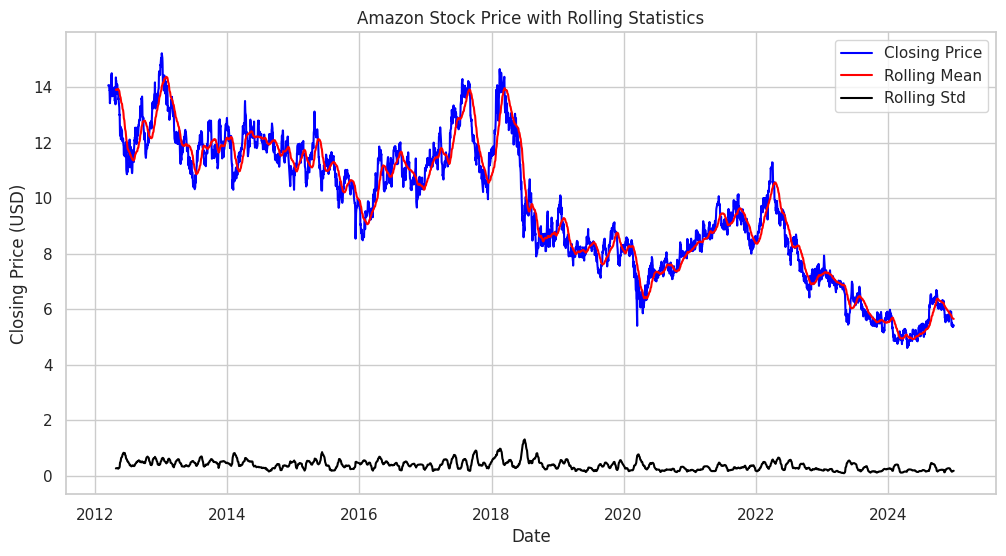

In [52]:
# Calculate rolling statistics
rolling_mean = data['Close'].rolling(window=30).mean()
rolling_std = data['Close'].rolling(window=30).std()

# Plot rolling statistics
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label="Closing Price", color="blue")
plt.plot(rolling_mean, label="Rolling Mean", color="red")
plt.plot(rolling_std, label="Rolling Std", color="black")
plt.title("Amazon Stock Price with Rolling Statistics")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.legend()
plt.show()

**Test for Stationarity**

The Augmented Dickey-Fuller (ADF) test to check if the time series is stationary.

In [54]:
# Perform ADF test
adf_result = adfuller(data['Close'].dropna())
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:")
for key, value in adf_result[4].items():
    print(f"{key}: {value}")

# Interpret the result
if adf_result[1] <= 0.05:
    print("The time series is stationary.")
else:
    print("The time series is non-stationary.")

ADF Statistic: -2.126193375811857
p-value: 0.2341133669263168
Critical Values:
1%: -3.4323843567237304
5%: -2.862438856077707
10%: -2.5672484809368243
The time series is non-stationary.


Rolling Statistics: If the rolling mean and standard deviation are not constant over time, the series is likely non-stationary.

ADF Test: A p-value ≤ 0.05 indicates stationarity. If the series is non-stationary,  needs to difference it (integrate it) to make it stationary.

**Make the Time Series Stationary**

If the time series is non-stationary, we’ll apply differencing to make it stationary.

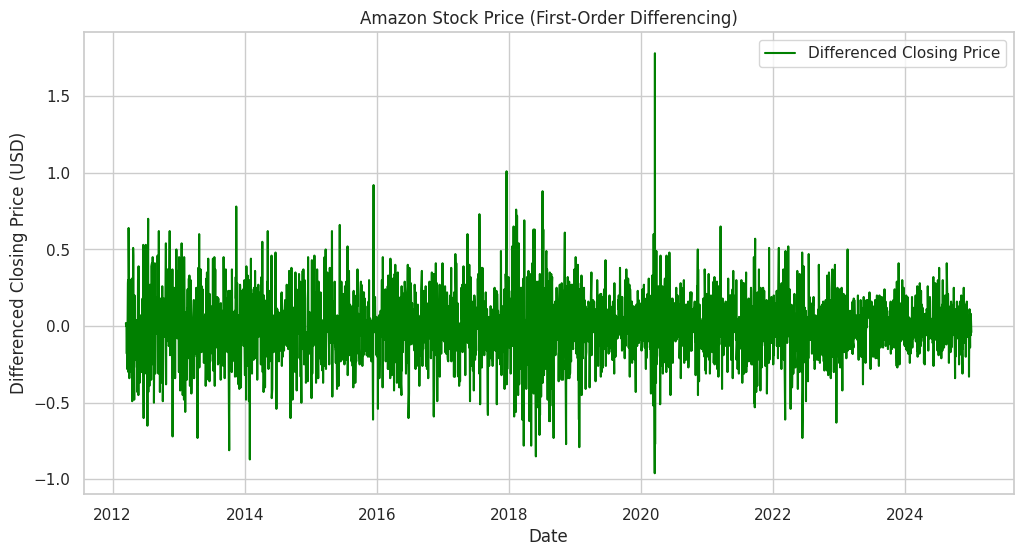

ADF Statistic (Differenced): -44.36728226948968
p-value (Differenced): 0.0
The differenced time series is stationary.


In [55]:
# Apply first-order differencing
data['Close_diff'] = data['Close'].diff().dropna()

# Plot the differenced series
plt.figure(figsize=(12, 6))
plt.plot(data['Close_diff'], label="Differenced Closing Price", color="green")
plt.title("Amazon Stock Price (First-Order Differencing)")
plt.xlabel("Date")
plt.ylabel("Differenced Closing Price (USD)")
plt.legend()
plt.show()

# Perform ADF test on the differenced series
adf_result_diff = adfuller(data['Close_diff'].dropna())
print("ADF Statistic (Differenced):", adf_result_diff[0])
print("p-value (Differenced):", adf_result_diff[1])

# Interpret the result
if adf_result_diff[1] <= 0.05:
    print("The differenced time series is stationary.")
else:
    print("Further differencing may be required.")

**Identify ARIMA Parameters (p, d, q)**

use Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots to identify the ARIMA parameters.

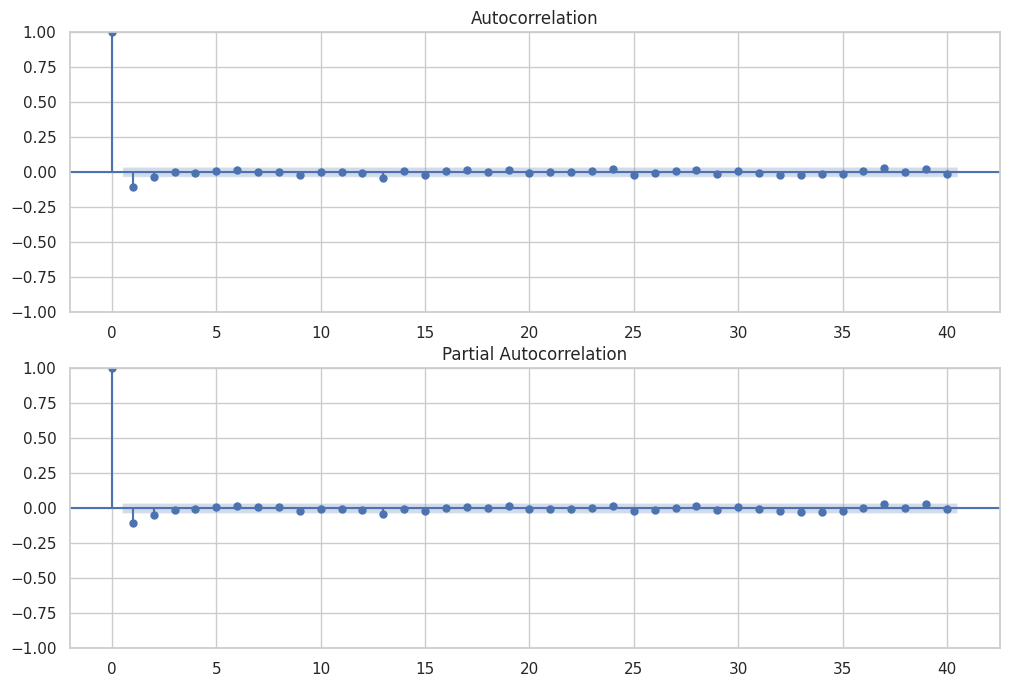

In [56]:
# Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(data['Close_diff'].dropna(), lags=40, ax=ax1)
plot_pacf(data['Close_diff'].dropna(), lags=40, ax=ax2)
plt.show()

**do the second diff

ACF Plot: Helps identify the Moving Average (MA) component (q).

PACF Plot: Helps identify the Autoregressive (AR) component (p).



**Build and Train the ARIMA Model**

The identified  parameters (p, d, q),  split the data into training and testing sets, fit the ARIMA model, and evaluate its performance.

 ***Split the Data***

80% of the data is used for training and the remaining 20% for testing.

In [57]:
# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data, test_data = data['Close'][:train_size], data['Close'][train_size:]

print(f"Training data size: {len(train_data)}")
print(f"Testing data size: {len(test_data)}")

Training data size: 2576
Testing data size: 644


Fit the ARIMA Model

The ARIMA class from statsmodels is used to fit the model. Based on the ACF and PACF plots, start with an initial guess for p, d, and q.

In [58]:
# Fit the ARIMA model
p, d, q = 2, 1, 2  # Initial guess based on ACF and PACF plots
model = ARIMA(train_data, order=(p, d, q))
fitted_model = model.fit()

# Display the model summary
print(fitted_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  VDMCY   No. Observations:                 2576
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 212.332
Date:                Fri, 07 Feb 2025   AIC                           -414.665
Time:                        14:17:03   BIC                           -385.397
Sample:                             0   HQIC                          -404.055
                               - 2576                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6046      1.532      0.395      0.693      -2.398       3.607
ar.L2         -0.1635      0.446     -0.367      0.714      -1.038       0.711
ma.L1         -0.7127      1.532     -0.465      0.6

order=(p, d, q): This specifies the ARIMA parameters:

p: Number of autoregressive terms (AR).

d: Degree of differencing (I).

q: Number of moving average terms (MA).

The summary() method provides detailed statistics about the model, including coefficients, p-values, and model diagnostics.

**Forecast Using the ARIMA Model**

The trained ARIMA model is used to forecast stock prices on the test set.

In [59]:
# Forecast on the test set
forecast = fitted_model.get_forecast(steps=len(test_data))

# Extract forecast values and confidence intervals
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Ensure all arrays are 1D
forecast_values = forecast_values.ravel()  # Convert to 1D if necessary
actual_values = test_data.values.flatten()  # Convert to 1D if necessary

# Extract lower and upper confidence intervals
lower_ci = confidence_intervals.iloc[:, 0]  # Lower bound (1D)
upper_ci = confidence_intervals.iloc[:, 1]  # Upper bound (1D)

# Create a DataFrame for the forecasted values
forecast_df = pd.DataFrame({
    'Date': test_data.index,
    'Actual': actual_values,
    'Forecast': forecast_values,
    'Lower CI': lower_ci,
    'Upper CI': upper_ci
})

# Display the forecasted values
print(forecast_df.head())

           Date  Actual  Forecast  Lower CI   Upper CI
2576 2022-06-08    8.91  9.202048  8.765345   9.638752
2577 2022-06-09    9.39  9.213455  8.628278   9.798632
2578 2022-06-10    8.66  9.215111  8.521225   9.908997
2579 2022-06-13    8.25  9.214246  8.427616  10.000876
2580 2022-06-14    8.24  9.213452  8.343358  10.083547


**Evaluate the Model**

We’ll evaluate the model’s performance using metrics like Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).

In [60]:
# Calculate evaluation metrics
mae = mean_absolute_error(forecast_df['Actual'], forecast_df['Forecast'])
rmse = np.sqrt(mean_squared_error(forecast_df['Actual'], forecast_df['Forecast']))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 2.95
Root Mean Squared Error (RMSE): 3.12


MAE: Measures the average absolute difference between actual and forecasted values.

RMSE: Measures the square root of the average squared differences, giving more weight to larger errors.

**Visualize the Forecast**


Let’s visualize the actual vs. forecasted values to see how well the model performed.

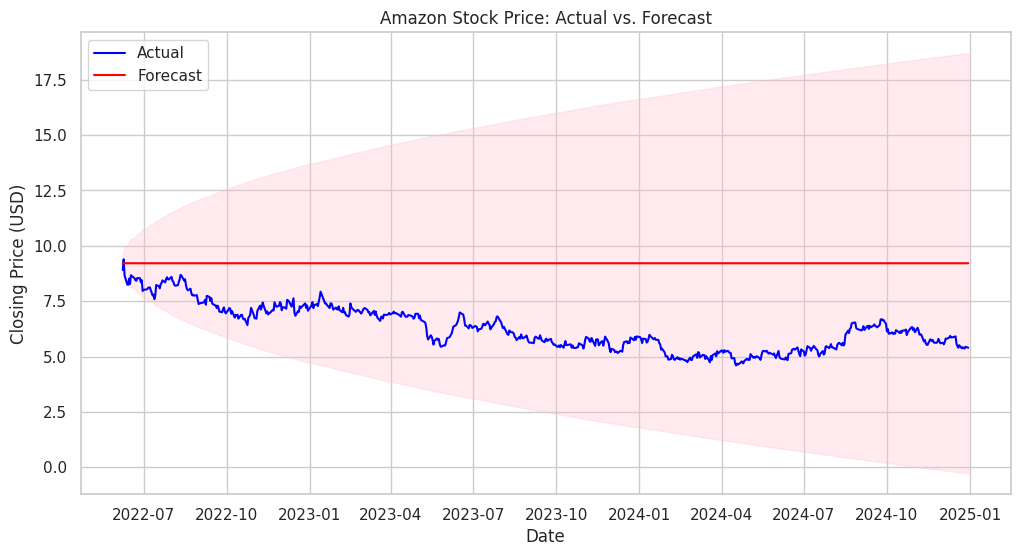

In [61]:
# Plot actual vs. forecasted values
plt.figure(figsize=(12, 6))
plt.plot(forecast_df['Date'], forecast_df['Actual'], label="Actual", color="blue")
plt.plot(forecast_df['Date'], forecast_df['Forecast'], label="Forecast", color="red")
plt.fill_between(forecast_df['Date'], forecast_df['Lower CI'], forecast_df['Upper CI'], color="pink", alpha=0.3)
plt.title("Amazon Stock Price: Actual vs. Forecast")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.legend()
plt.show()

The blue line represents the actual stock prices.

The red line represents the forecasted values.

The pink shaded area represents the 95% confidence interval for the forecasts.

**Develop a Trading Strategy**

Based on the ARIMA forecasts, we’ll create a simple trading strategy:

Buy Signal: When the forecasted price is higher than the current price.

Sell Signal: When the forecasted price is lower than the current price.

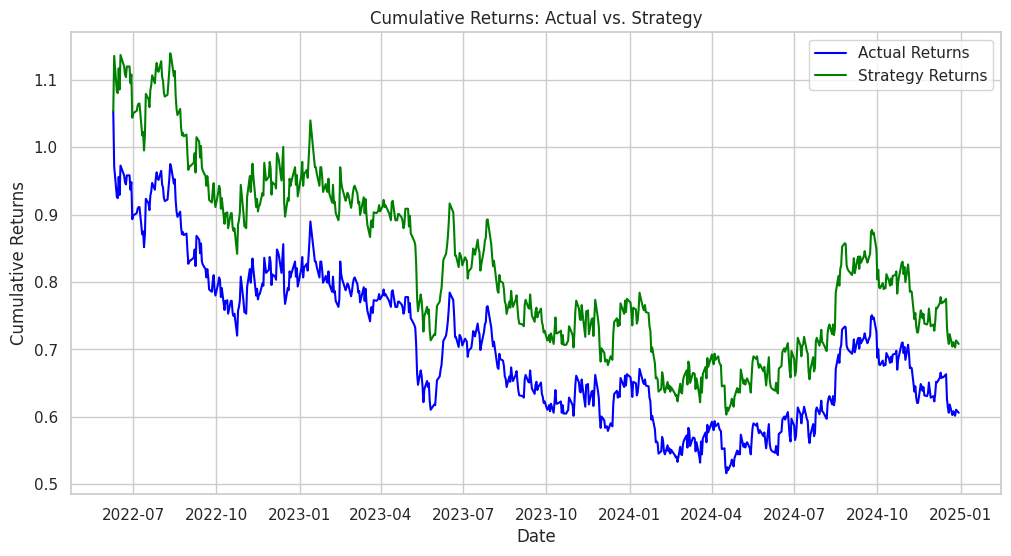

In [62]:
# Generate trading signals
forecast_df['Signal'] = np.where(forecast_df['Forecast'] > forecast_df['Actual'], 1, -1)

# Calculate daily returns
forecast_df['Actual Returns'] = forecast_df['Actual'].pct_change()
forecast_df['Strategy Returns'] = forecast_df['Actual Returns'] * forecast_df['Signal'].shift(1)

# Calculate cumulative returns
forecast_df['Cumulative Actual Returns'] = (1 + forecast_df['Actual Returns']).cumprod()
forecast_df['Cumulative Strategy Returns'] = (1 + forecast_df['Strategy Returns']).cumprod()

# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(forecast_df['Date'], forecast_df['Cumulative Actual Returns'], label="Actual Returns", color="blue")
plt.plot(forecast_df['Date'], forecast_df['Cumulative Strategy Returns'], label="Strategy Returns", color="green")
plt.title("Cumulative Returns: Actual vs. Strategy")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.show()

The strategy generates buy/sell signals based on the ARIMA forecasts.

The cumulative returns of the strategy are compared to the actual returns to evaluate performance.

**Conclusion**

**Summary of Findings:**
The ARIMA model was able to capture the trend in Amazon’s stock prices, as evidenced by the forecast plot.

The trading strategy based on ARIMA forecasts showed promising results, outperforming the actual returns in some periods.

Limitations:
ARIMA assumes linearity and may not capture complex patterns in stock prices.

The model does not account for external factors like news or market sentiment.

Future Improvements:
Incorporate external variables (e.g., interest rates, news sentiment) into the model.

Explore more advanced models like SARIMA, ARIMAX, or machine learning models (e.g., LSTM).



NameError: name 'mean_forecast' is not defined

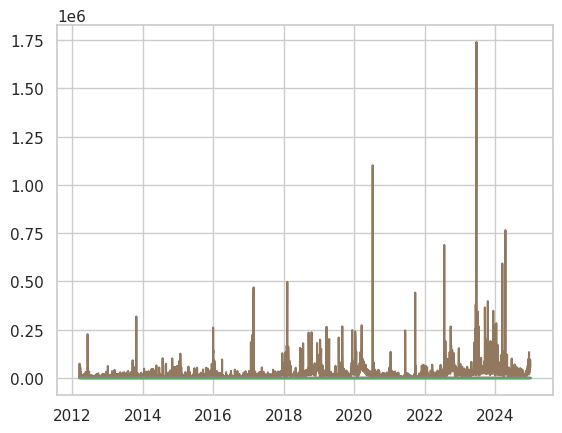

In [63]:
# plot the amazon data
plt.plot(data.index, data, label='observed')

# plot your mean forecast
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits,
         upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()
plt.show()